In [18]:
import csv
import re
import pandas as pd
import pathlib
from pathlib import Path
import matplotlib.pyplot as plt

In [19]:
def get_longest_shortest (path_dir):
    amino_acid_list = ["G","A","L","M","F","W","K","Q","E","S","P","V","I","C","Y","H","R","N","D","T"]
    aa_counter = 0
    longest = ()
    shortest = ()
    
    
    #output_df = pd.Dataframe(columns = ["AminoAcids":amino_acid_list,"Counter":zero_list])
    with open(path_dir) as input_data:
        for line in input_data:
            if line.startswith(">"):                
                if aa_counter != 0:                    
                    if len(longest) == 0:
                        shortest = (current_protein, aa_counter)
                        longest = (current_protein, aa_counter)
                    else:
                        if aa_counter > longest[1]:
                           longest = (current_protein, aa_counter)
                        if aa_counter < shortest[1]:
                           shortest = (current_protein, aa_counter)  
                    current_protein = line
                else:
                    current_protein = line
                aa_counter = 0
            else:
                for i in range(len(amino_acid_list)):
                    stripped_line = line.strip("\n")
                    count_single_AA_list = re.findall(amino_acid_list[i], stripped_line)
                    aa_counter += len(count_single_AA_list)
    longest_shortest = [longest, shortest]
    return longest_shortest

In [20]:
def open_and_parse_fasta_file_func (path_dir, file_name):
    amino_acid_list = ["G","A","L","M","F","W","K","Q","E","S","P","V","I","C","Y","H","R","N","D","T"]
    counter_list = [0] * 20
    
    parent_path = Path(path_dir)
    parent_path = parent_path.parents[0]
    new_path = str(parent_path) + "\\" + file_name + ".csv"
    new_path_2 = str(parent_path) + "\\" + file_name + ".png"
    #output_df = pd.Dataframe(columns = ["AminoAcids":amino_acid_list,"Counter":zero_list])
    with open(path_dir) as input_data:
        for line in input_data:
            if line.startswith(">"):
                a = 0
            else:
                for i in range(len(amino_acid_list)):
                    stripped_line = line.strip("\n")
                    count_single_AA_list = re.findall(amino_acid_list[i], stripped_line)
                    counter_list[i] += len(count_single_AA_list)
    #Create and save the new file     
    with open(new_path, 'w', newline='') as myfile:
     wr = csv.writer(myfile)
     name_list = ["AminoAcids", "counter"]
     wr.writerow(name_list)
     for i in range(len(amino_acid_list)):
         #write_string = amino_acid_list[i] + ", " + str(counter_list[i])
         wr.writerow([amino_acid_list[i], counter_list[i]])
    
    data_df = pd.DataFrame({"AA":amino_acid_list, "counter":counter_list})

    #Plot the Barplot
    plt.bar(amino_acid_list, counter_list, color ='maroon',
        width = 0.4)
 
    plt.xlabel("AA")
    plt.ylabel("Counts")
    plt.title("Barplot_" + file_name)    
    plt.savefig(new_path_2)
    plt.show()



In [21]:
def get_hydrophobic_hydrophic (path_dir):
    amino_acid_list = ["I","V",	"L", 	"F", 	"C", 	"M", 	"A", 	"W",	"G", 	"T", 	"S", 	"Y", 	"P", 	"H", 	"N", 	"D", 	"Q", 	"E", 	"K", 	"R"]
    aa_hydropathy_list = [4.5, 4.2, 3.8, 2.8, 2.5, 1.9, 1.8, -0.9, -0.4, -0.7, -0.8, -1.3, -1.6, -3.2, -3.5, -3.5, -3.5, -3.5, -3.9, -4.5]
    hydropathy_counter = 0
    hydrophic = ()
    hydrophobic = ()
    counter_list = [0] * 20
    
    
    #output_df = pd.Dataframe(columns = ["AminoAcids":amino_acid_list,"Counter":zero_list])
    with open(path_dir) as input_data:
        for line in input_data:
            if line.startswith(">"):                
                                
                if len(hydrophic) == 0:
                    current_protein = line
                    hydrophobic = (current_protein, hydropathy_counter)
                    hydrophic = (current_protein, hydropathy_counter)
                else:
                    hydropathy_counter = sum([a * b for a, b in zip(aa_hydropathy_list, counter_list)])
                    if hydropathy_counter < hydrophic[1]:
                        hydrophic = (current_protein, hydropathy_counter)
                    if hydropathy_counter > hydrophobic[1]:
                        hydrophobic = (current_protein, hydropathy_counter)
                    current_protein = line  
                
                
            
                hydropathy_counter = 0
                counter_list = [0] * 20
            else:
                for i in range(len(amino_acid_list)):
                    stripped_line = line.strip("\n")
                    count_single_AA_list = re.findall(amino_acid_list[i], stripped_line)
                    counter_list[i] += len(count_single_AA_list)
    hydrophobic_hydrophic = [hydrophobic, hydrophic]
    return hydrophobic_hydrophic

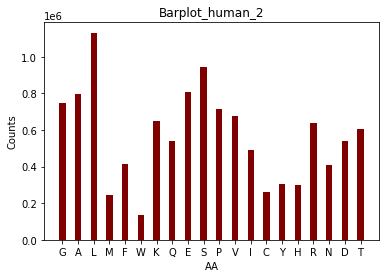

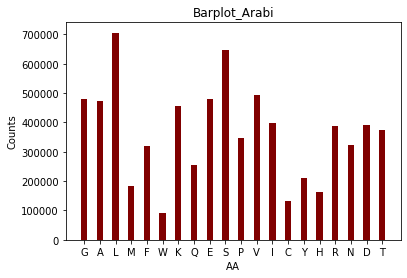

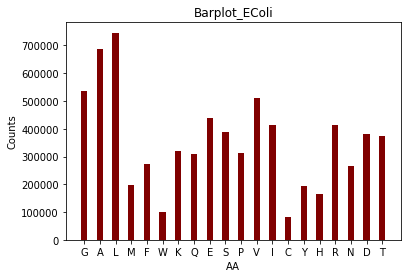

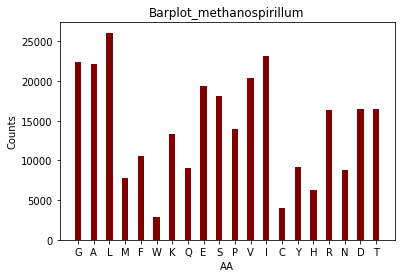

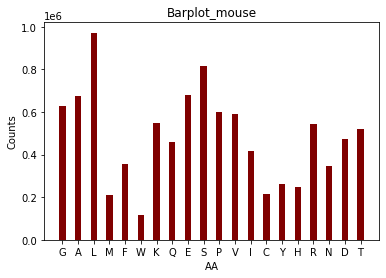

In [22]:
open_and_parse_fasta_file_func("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\human_2.fasta", "human_2")
open_and_parse_fasta_file_func("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\Arabi.fasta", "Arabi")
open_and_parse_fasta_file_func("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\EColi.fasta", "EColi")
open_and_parse_fasta_file_func("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\methanospirillum.fasta", "methanospirillum")
open_and_parse_fasta_file_func("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\mouse.fasta", "mouse")

In [23]:
def get_extremes_density (file_name):
    directory = pathlib.Path().resolve()
    aa_properties_path = str(directory) + "/amino_acid_properties.csv"
    aa_properties_path = pathlib.Path(aa_properties_path)
    aa_properties_df = pd.read_csv(aa_properties_path)

    protein_path = str(directory) + "/" + file_name
    protein_path = pathlib.Path(protein_path)
    
    amino_acid_list = aa_properties_df["1-letter code"]
    aa_mw_list = aa_properties_df["Molecular Weight"]
    mw_counter = 0
    low_mw = ()
    high_mw = ()
    counter_list = [0] * 20
    
    
    #output_df = pd.Dataframe(columns = ["AminoAcids":amino_acid_list,"Counter":zero_list])
    with open(protein_path) as input_data:
        for line in input_data:
            if line.startswith(">"):                
                                
                if len(low_mw) == 0:
                    current_protein = line
                    high_mw = (current_protein, mw_counter)
                    low_mw = (current_protein, mw_counter)
                    first_protein = True
                else:
                    if first_protein == True:
                        mw_counter = sum([a * b for a, b in zip(aa_mw_list, counter_list)])
                        mw_counter = mw_counter/sum(counter_list)
                        high_mw = (current_protein, mw_counter)
                        low_mw = (current_protein, mw_counter)
                        first_protein = False
                    else:
                        mw_counter = sum([a * b for a, b in zip(aa_mw_list, counter_list)])
                        mw_counter = mw_counter/sum(counter_list)
                        if mw_counter < low_mw[1]:
                            low_mw = (current_protein, mw_counter)
                        if mw_counter > high_mw[1]:
                            high_mw = (current_protein, mw_counter)
                        current_protein = line  
                
                
                mw_counter = 0
                counter_list = [0] * 20
            else:
                for i in range(len(amino_acid_list)):
                    stripped_line = line.strip("\n")
                    count_single_AA_list = re.findall(amino_acid_list[i], stripped_line)
                    counter_list[i] += len(count_single_AA_list)
    high_mw_low_mw = [high_mw, low_mw]
    return high_mw_low_mw

def get_extremes_pI (file_name):
    directory = pathlib.Path().resolve()
    aa_properties_path = str(directory) + "/amino_acid_properties.csv"
    aa_properties_path = pathlib.Path(aa_properties_path)
    aa_properties_df = pd.read_csv(aa_properties_path)

    protein_path = str(directory) + "/" + file_name
    protein_path = pathlib.Path(protein_path)
    
    amino_acid_list = aa_properties_df["1-letter code"]
    aa_mw_list = aa_properties_df["pI"]
    mw_counter = 0
    low_mw = ()
    high_mw = ()
    counter_list = [0] * 20
    
    
    #output_df = pd.Dataframe(columns = ["AminoAcids":amino_acid_list,"Counter":zero_list])
    with open(protein_path) as input_data:
        for line in input_data:
            if line.startswith(">"):                
                                
                if len(low_mw) == 0:
                    current_protein = line
                    high_mw = (current_protein, mw_counter)
                    low_mw = (current_protein, mw_counter)
                    first_protein = True
                else:
                    if first_protein == True:
                        mw_counter = sum([a * b for a, b in zip(aa_mw_list, counter_list)])
                        high_mw = (current_protein, mw_counter)
                        low_mw = (current_protein, mw_counter)
                        first_protein = False
                    else:
                        mw_counter = sum([a * b for a, b in zip(aa_mw_list, counter_list)])
                        mw_counter = mw_counter/sum(counter_list)
                        if mw_counter < low_mw[1]:
                            low_mw = (current_protein, mw_counter)
                        if mw_counter > high_mw[1]:
                            high_mw = (current_protein, mw_counter)
                        current_protein = line  
                
                
                mw_counter = 0
                counter_list = [0] * 20
            else:
                for i in range(len(amino_acid_list)):
                    stripped_line = line.strip("\n")
                    count_single_AA_list = re.findall(amino_acid_list[i], stripped_line)
                    counter_list[i] += len(count_single_AA_list)
    high_mw_low_mw = [high_mw, low_mw]
    return high_mw_low_mw



In [24]:
print(get_longest_shortest("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\human_2.fasta"))
print(get_longest_shortest("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\Arabi.fasta"))
print(get_longest_shortest("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\EColi.fasta"))

[('>sp|Q8WZ42|TITIN_HUMAN Titin OS=Homo sapiens OX=9606 GN=TTN PE=1 SV=4\n', 34350), ('>sp|P0DPR3|TRDD1_HUMAN T cell receptor delta diversity 1 OS=Homo sapiens OX=9606 GN=TRDD1 PE=1 SV=1\n', 2)]
[('>sp|A0A1P8AUY4|MDN1_ARATH Midasin OS=Arabidopsis thaliana OX=3702 GN=MDN1 PE=1 SV=1\n', 5400), ('>sp|P0DKJ0|P160B_ARATH Peptide encoded by miPEP160b OS=Arabidopsis thaliana OX=3702 GN=miPEP160b PE=4 SV=1\n', 5)]
[('>sp|P0DSI1|CDIA_ECONC tRNA nuclease CdiA OS=Escherichia coli (strain NC101) OX=753642 GN=cdiA PE=1 SV=1\n', 3289), ('>sp|Q47505|MCCC7_ECOLX Microcin C7 OS=Escherichia coli OX=562 GN=mccA PE=1 SV=1\n', 7)]


In [25]:
print(get_hydrophobic_hydrophic("D:\EIGENE DATEIEN\Documents\!UNI\Coding\Advanced Python\Exercise_1\human_2.fasta"))

[('>sp|P15502|ELN_HUMAN Elastin OS=Homo sapiens OX=9606 GN=ELN PE=1 SV=4\n', 491.70000000000005), ('>sp|Q8WZ42|TITIN_HUMAN Titin OS=Homo sapiens OX=9606 GN=TTN PE=1 SV=4\n', -16063.900000000003)]


In [26]:
print(get_extremes_density("human_2.fasta"))

[('>sp|P62945|RL41_HUMAN 60S ribosomal protein L41 OS=Homo sapiens OX=9606 GN=RPL41 PE=1 SV=1\n', 155.54840000000002), ('>sp|P0DPI4|TDB01_HUMAN T cell receptor beta diversity 1 OS=Homo sapiens OX=9606 GN=TRBD1 PE=4 SV=1\n', 86.0825)]


In [27]:

print(get_extremes_pI("human_2.fasta"))

[('>sp|Q00266|METK1_HUMAN S-adenosylmethionine synthase isoform type-1 OS=Homo sapiens OX=9606 GN=MAT1A PE=1 SV=2\n', 2371.1), ('>sp|P0DPR3|TRDD1_HUMAN T cell receptor delta diversity 1 OS=Homo sapiens OX=9606 GN=TRDD1 PE=1 SV=1\n', 4.62)]
